In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib as j
import pathlib as p

In [2]:
# Cargar datos
data_path = '../data/processed/data_set.csv'
df = pd.read_csv(data_path)

# Separar variables independientes y dependiente
X = df.drop('desertor', axis=1)  # Cambia 'desertor' si tu columna objetivo tiene otro nombre
y = df['desertor']

# Balanceo de clases
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Entrenar modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[58  1]
 [ 7 46]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.94        59
           1       0.98      0.87      0.92        53

    accuracy                           0.93       112
   macro avg       0.94      0.93      0.93       112
weighted avg       0.93      0.93      0.93       112



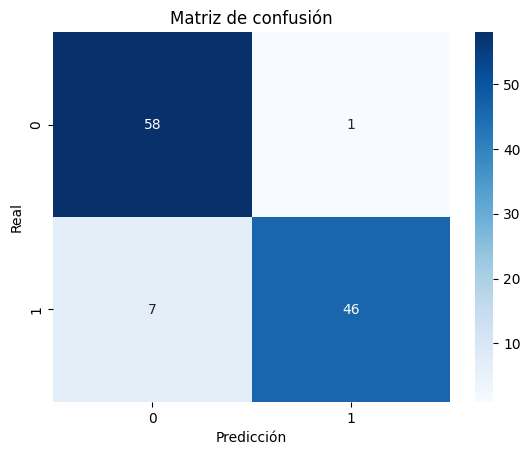

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

matriz_confusion = confusion_matrix(y_test,y_pred)

sns.heatmap(matriz_confusion,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

In [4]:
path_save = p.Path('../models/modelo_arboles_de_decision.pkl')
j.dump(model,path_save)

['..\\models\\modelo_arboles_de_decision.pkl']